# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Use the JSON module to load and parse JSON documents
* Load and explore unknown JSON schemas
* Convert JSON to a pandas dataframe

## Loading the JSON file

Load the data from the file `disease_data.json`.

In [1]:
import json
import pandas as pd

pd.set_option('display.max_columns', None)

f = open('disease_data.json')
data = json.load(f)

## Explore the first and second levels of the schema hierarchy

In [2]:
for k in data.keys():
    print(k, '\t', type(data[k]))

meta 	 <class 'dict'>
data 	 <class 'list'>


In [3]:
## Exploring Data

for x in data['data'][:5]:
    print(x)

[1, 'FF49C41F-CE8D-46C4-9164-653B1227CF6F', 1, 1527194521, '959778', 1527194521, '959778', None, '2016', '2016', 'US', 'United States', 'BRFSS', 'Alcohol', 'Binge drinking prevalence among adults aged >= 18 years', None, '%', 'Crude Prevalence', '16.9', '16.9', '*', '50 States + DC: US Median', '16', '18', 'Overall', 'Overall', None, None, None, None, [None, None, None, None, None], None, '59', 'ALC', 'ALC2_2', 'CRDPREV', 'OVERALL', 'OVR', None, None, None, None]
[2, 'F4468C3D-340A-4CD2-84A3-DF554DFF065E', 2, 1527194521, '959778', 1527194521, '959778', None, '2016', '2016', 'AL', 'Alabama', 'BRFSS', 'Alcohol', 'Binge drinking prevalence among adults aged >= 18 years', None, '%', 'Crude Prevalence', '13', '13', None, None, '11.9', '14.1', 'Overall', 'Overall', None, None, None, None, [None, '32.84057112200048', '-86.63186076199969', None, False], None, '01', 'ALC', 'ALC2_2', 'CRDPREV', 'OVERALL', 'OVR', None, None, None, None]
[3, '65609156-A343-4869-B03F-2BA62E96AC19', 3, 1527194521, '

In [4]:
## Exploring Meta

for k in data['meta'].keys():
    print(k, '\t', type(data['meta'][k]))

view 	 <class 'dict'>


In [5]:
for k in data['meta']['view'].keys():
    print(k, '\t', type(data['meta']['view'][k]))

id 	 <class 'str'>
name 	 <class 'str'>
attribution 	 <class 'str'>
attributionLink 	 <class 'str'>
averageRating 	 <class 'int'>
category 	 <class 'str'>
createdAt 	 <class 'int'>
description 	 <class 'str'>
displayType 	 <class 'str'>
downloadCount 	 <class 'int'>
hideFromCatalog 	 <class 'bool'>
hideFromDataJson 	 <class 'bool'>
indexUpdatedAt 	 <class 'int'>
licenseId 	 <class 'str'>
newBackend 	 <class 'bool'>
numberOfComments 	 <class 'int'>
oid 	 <class 'int'>
provenance 	 <class 'str'>
publicationAppendEnabled 	 <class 'bool'>
publicationDate 	 <class 'int'>
publicationGroup 	 <class 'int'>
publicationStage 	 <class 'str'>
rowClass 	 <class 'str'>
rowsUpdatedAt 	 <class 'int'>
rowsUpdatedBy 	 <class 'str'>
tableId 	 <class 'int'>
totalTimesRated 	 <class 'int'>
viewCount 	 <class 'int'>
viewLastModified 	 <class 'int'>
viewType 	 <class 'str'>
columns 	 <class 'list'>
grants 	 <class 'list'>
license 	 <class 'dict'>
metadata 	 <class 'dict'>
owner 	 <class 'dict'>
query 	 <clas

## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [6]:
df = pd.DataFrame(data['data'])
df.columns = [x['name'] for x in data['meta']['view']['columns']]
df.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,GeoLocation,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,1,FF49C41F-CE8D-46C4-9164-653B1227CF6F,1,1527194521,959778,1527194521,959778,None,2016,2016,US,United States,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,None,%,Crude Prevalence,16.9,16.9,*,50 States + DC: US Median,16,18,Overall,Overall,None,None,None,None,"[None, None, None, None, None]",None,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
1,2,F4468C3D-340A-4CD2-84A3-DF554DFF065E,2,1527194521,959778,1527194521,959778,None,2016,2016,AL,Alabama,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,None,%,Crude Prevalence,13,13,None,None,11.9,14.1,Overall,Overall,None,None,None,None,"[None, 32.84057112200048, -86.63186076199969, ...",None,01,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
2,3,65609156-A343-4869-B03F-2BA62E96AC19,3,1527194521,959778,1527194521,959778,None,2016,2016,AK,Alaska,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,None,%,Crude Prevalence,18.2,18.2,None,None,16,20.6,Overall,Overall,None,None,None,None,"[None, 64.84507995700051, -147.72205903599973,...",None,02,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
3,4,0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3,4,1527194521,959778,1527194521,959778,None,2016,2016,AZ,Arizona,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,None,%,Crude Prevalence,15.6,15.6,None,None,14.3,16.9,Overall,Overall,None,None,None,None,"[None, 34.865970280000454, -111.76381127699972...",None,04,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
4,5,D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B,5,1527194521,959778,1527194521,959778,None,2016,2016,AR,Arkansas,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,None,%,Crude Prevalence,15,15,None,None,13,17.2,Overall,Overall,None,None,None,None,"[None, 34.74865012400045, -92.27449074299966, ...",None,05,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None


## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

In [7]:
for col in df.columns:
    print(col, '\n', df[col].head())
    print('\n')

sid 
 0    1
1    2
2    3
3    4
4    5
Name: sid, dtype: int64


id 
 0    FF49C41F-CE8D-46C4-9164-653B1227CF6F
1    F4468C3D-340A-4CD2-84A3-DF554DFF065E
2    65609156-A343-4869-B03F-2BA62E96AC19
3    0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3
4    D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B
Name: id, dtype: object


position 
 0    1
1    2
2    3
3    4
4    5
Name: position, dtype: int64


created_at 
 0    1527194521
1    1527194521
2    1527194521
3    1527194521
4    1527194521
Name: created_at, dtype: int64


created_meta 
 0    959778
1    959778
2    959778
3    959778
4    959778
Name: created_meta, dtype: object


updated_at 
 0    1527194521
1    1527194521
2    1527194521
3    1527194521
4    1527194521
Name: updated_at, dtype: int64


updated_meta 
 0    959778
1    959778
2    959778
3    959778
4    959778
Name: updated_meta, dtype: object


meta 
 0    None
1    None
2    None
3    None
4    None
Name: meta, dtype: object


YearStart 
 0    2016
1    2016
2    2016
3    2016
4   

In [8]:
# Isolate TopicID to subjects that have to do with Asthma.
asth_df = df.loc[df['TopicID'] == 'AST'][df.columns[8:]]

In [9]:
# Drop columns that are all NaN
asth_df.dropna(axis=1, how='all', inplace=True)

In [10]:
# Clean columns to numeric.
for col in asth_df.columns:
    asth_df[col] = pd.to_numeric(asth_df[col], errors='ignore')

asth_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4675 entries, 4725 to 14053
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  4675 non-null   int64  
 1   YearEnd                    4675 non-null   int64  
 2   LocationAbbr               4675 non-null   object 
 3   LocationDesc               4675 non-null   object 
 4   DataSource                 4675 non-null   object 
 5   Topic                      4675 non-null   object 
 6   Question                   4675 non-null   object 
 7   DataValueUnit              4675 non-null   object 
 8   DataValueType              4675 non-null   object 
 9   DataValue                  2620 non-null   float64
 10  DataValueAlt               2620 non-null   float64
 11  DataValueFootnoteSymbol    2087 non-null   object 
 12  DatavalueFootnote          2087 non-null   object 
 13  LowConfidenceLimit         2619 non-null   f

In [11]:
# Clean columns to datetime.

asth_df['YearStart'] = pd.to_datetime(asth_df['YearStart'], format='%Y')
asth_df['YearEnd'] = pd.to_datetime(asth_df['YearEnd'], format='%Y')

In [12]:
asth_df.Question.unique()

array(['Current asthma prevalence among adults aged >= 18 years',
       'Asthma prevalence among women aged 18-44 years',
       'Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma',
       'Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma',
       'Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma',
       'Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma'],
      dtype=object)

In [13]:
# Query the relevant question.
asth_df = asth_df[asth_df.Question == 'Current asthma prevalence among adults aged >= 18 years']

In [14]:
asth_df.DataValueType.unique()

array(['Crude Prevalence', 'Age-adjusted Prevalence'], dtype=object)

In [15]:
# Query the relevant ValueType
asth_df = asth_df[asth_df.DataValueType == 'Crude Prevalence']

In [16]:
asth_df.StratificationCategoryID1.unique()

array(['GENDER', 'OVERALL', 'RACE'], dtype=object)

In [17]:
asth_df = asth_df[asth_df.StratificationCategoryID1 == 'OVERALL']

In [18]:
asth_df.drop(asth_df.loc[asth_df.LocationDesc == 'United States'].index, inplace=True)

In [19]:
asth_df.LocationDesc

9371                 Alabama
9372                  Alaska
9373                 Arizona
9374                Arkansas
9375              California
9376                Colorado
9377             Connecticut
9378                Delaware
9379    District of Columbia
9380                 Florida
9381                 Georgia
9382                  Hawaii
9383                   Idaho
9384                Illinois
9385                 Indiana
9386                    Iowa
9387                  Kansas
9388                Kentucky
9389               Louisiana
9390                   Maine
9391                Maryland
9392           Massachusetts
9393                Michigan
9394               Minnesota
9395             Mississippi
9396                Missouri
9397                 Montana
9398                Nebraska
9399                  Nevada
9400           New Hampshire
9401              New Jersey
9402              New Mexico
9403                New York
9404          North Carolina
9405          

In [20]:
asth_sum = asth_df.groupby('LocationAbbr').sum().reset_index()

In [21]:
asth_sum.sort_values('DataValue', inplace=True)
asth_sum.head()

,LocationAbbr,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,LocationID
11,GU,5.1,5.1,3.7,7.1,66
43,SD,6.2,6.2,5.2,7.3,46
48,VI,6.3,6.3,4.4,9.1,78
9,FL,6.7,6.7,6.2,7.3,12
24,MN,7.6,7.6,7.1,8.1,27


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')

In [23]:
# plt.style.available

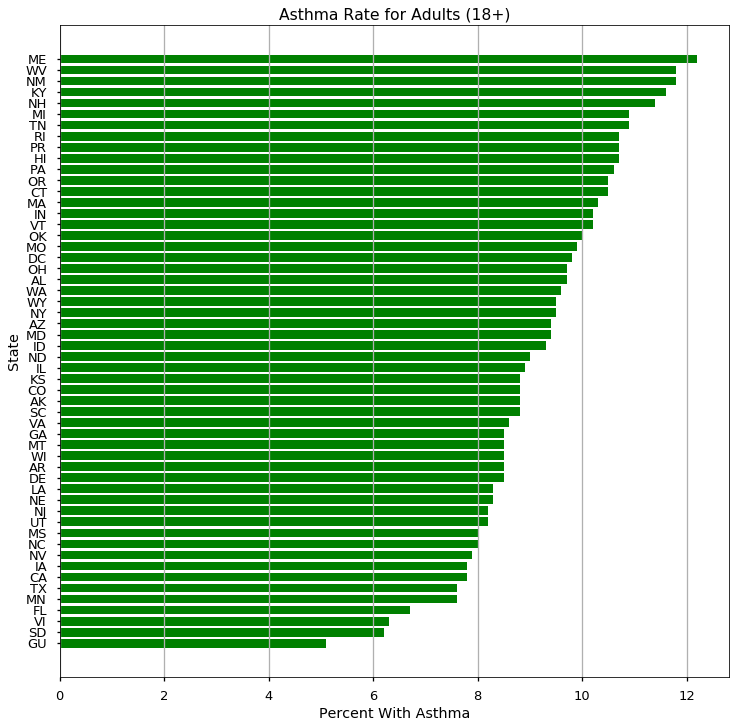

In [24]:
fig, ax = plt.subplots(figsize=(12,12))

ax.barh(y='LocationAbbr', width='DataValue', color='green', data=asth_sum)
ax.grid(axis='x')
ax.set(title='Asthma Rate for Adults (18+)', ylabel='State',
      xlabel='Percent With Asthma');

## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files, converting json files to pandas DataFrame, and visualizing data!